In [7]:
!pip install datascience

    100% |████████████████████████████████| 40kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 286kB 5.1MB/s ta 0:00:01    75% |████████████████████████▏       | 215kB 4.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for datascience ... done
  Stored in directory: /home/ao/.cache/pip/wheels/da/24/ce/c7c52ff09b932c681f314c3c0afc9117964c444ec393a5d8b9
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /home/ao/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
  Running setup.py bdist_wheel for coverage ... done
  Stored in directory: /home/ao/.cache/pip/wheels/68/58/66/f1fc9afad272df0df0fa38cdef34ee2d5d8d6a85f4eb5acab5
  Running setup.py bdist_wheel for coveralls ... done
  Stored in directory: /home/ao/.cache/pip/wheels/50/54/3b/b62b1288fa80808256abccca3b8fff97ed694404c4f5fe2646
  Running setup.py bdist_wheel for docopt ... done
  Stored in directory:

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
values = make_array(2, 3, 3, 9)

In [4]:
sum(values)/len(values), np.average(values), np.mean(values
                            )

(4.25, 4.25, 4.25)

In [5]:
values_table = Table().with_columns('Value', values)
values_table

Value
2
3
3
9


In [6]:
bins_for_display = np.arange(0.5, 10,1)

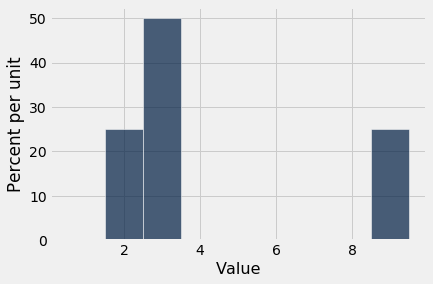

In [7]:
values_table.hist(bins=bins_for_display, ec='w')
#the ec option is centering the histogram bars on the individual values

In [8]:
np.ones(10)
#creates an array of 10 1s

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
twos = 2 * np.ones(10)
threes = 3 * np.ones(20)
nines = 9 * np.ones(10)
#arrays of numbers

In [10]:
new_values = np.append(np.append(twos, threes), nines)

In [11]:
len(new_values)

40

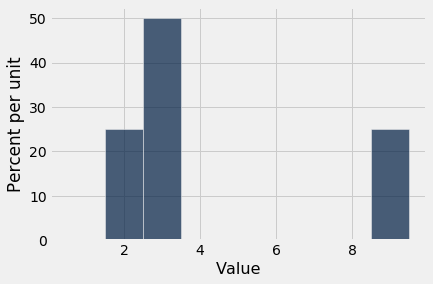

In [12]:
new_values_table = Table().with_column('Value', new_values)
new_values_table.hist(bins = bins_for_display)

In [13]:
np.average(new_values), np.average(values)

(4.25, 4.25)

In [14]:
values2 = make_array(1, 2, 2, 3, 3, 3, 4, 4, 5)

In [15]:
values_table2 = Table().with_columns('Value', values2)
values_table2

Value
1
2
2
3
3
3
4
4
5


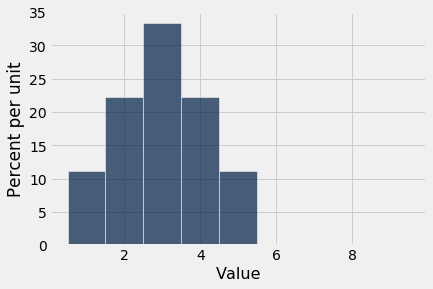

In [16]:
values_table2.hist(bins=bins_for_display, ec='w')


In [17]:
sum(values2)/len(values2), np.average(values2)

(3.0, 3.0)

In [18]:
np.median(values2)

3.0

In [67]:
nba = Table.read_table("nba2013.csv")
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


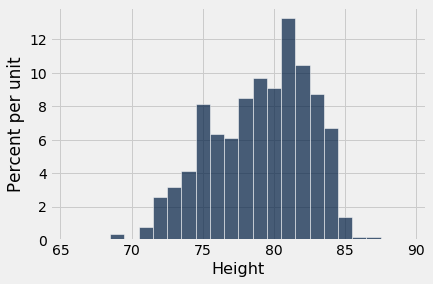

In [27]:
nba.hist('Height', bins = np.arange(65.5, 90.5), ec = 'w')

In [28]:
heights = nba.column('Height')

In [29]:
percentile(50, heights), np.average(heights)

(80, 79.06534653465347)

# Standard Deviation 

In [33]:
sd_table = Table().with_columns('Vaue', values)
sd_table

In [35]:
average = np.average(values)
average

In [39]:
deviations = values - average
sd_table = sd_table.with_columns('Deviation', deviations)
sd_table

In [41]:
sd_table = sd_table.with_columns('Squared Deviations', deviations ** 2)
sd_table

In [44]:
#Variance = the average of the squared deviations
variance = np.average(sd_table.column('Squared Deviations'))
variance

7.6875

In [47]:
# SD = the square root of the variance
standard_deviation = variance ** 0.5
standard_deviation

2.7726341266023544

In [48]:
np.std(values)

2.7726341266023544

In [49]:
births = Table.read_table("baby.csv")
births

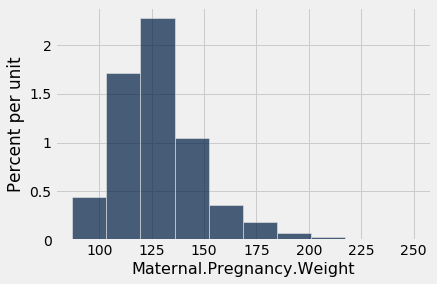

In [53]:
births.hist("Maternal.Pregnancy.Weight")

In [54]:
npw = births.column('Maternal.Pregnancy.Weight')
average = np.average(npw)

In [55]:
sd = np.std(npw)

In [56]:
average, sd

(128.4787052810903, 20.72544970428041)

In [60]:
within_3_SDs = births.where('Maternal.Pregnancy.Weight', are.between(average - 3*sd, average + 3*sd))

In [61]:
within_3_SDs.num_rows/births.num_rows

0.9863713798977853

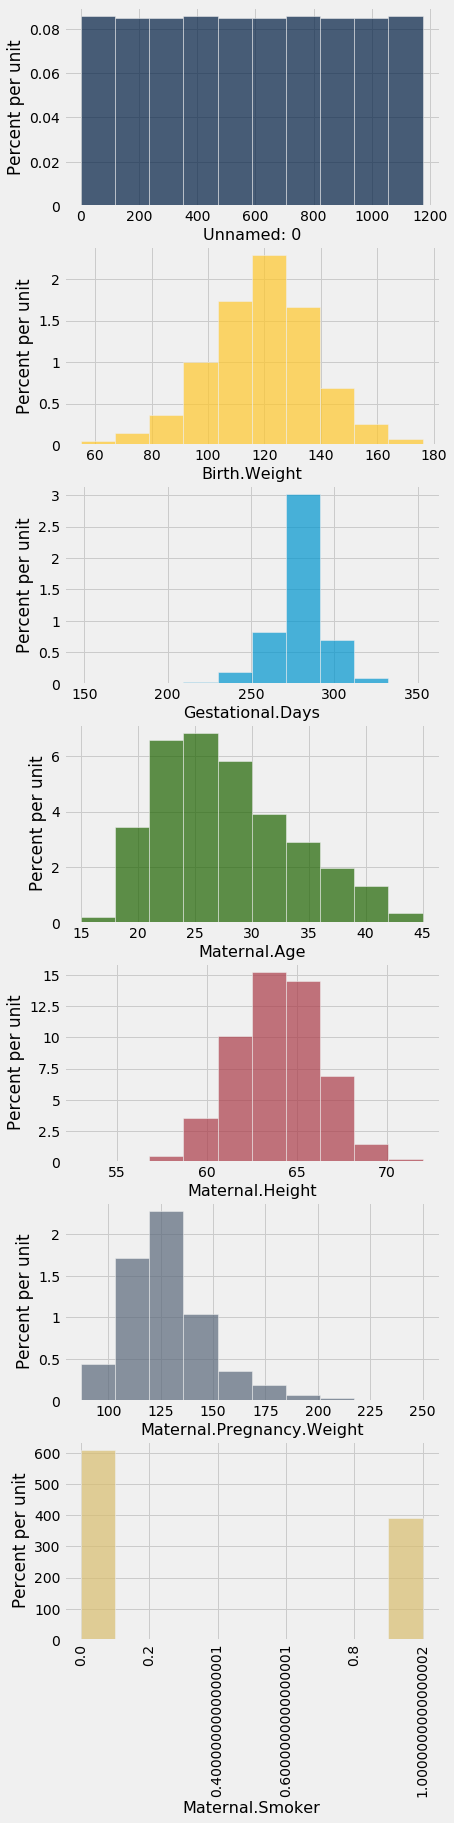

In [62]:
births.hist(overlay = False)

In [63]:
births.labels

('Unnamed: 0',
 'Birth.Weight',
 'Gestational.Days',
 'Maternal.Age',
 'Maternal.Height',
 'Maternal.Pregnancy.Weight',
 'Maternal.Smoker')

In [66]:
for k in births.labels:
    values = births.column(k)
    average = np.average(values)
    sd = np.std(values)
    print() #prints a new empty row
    print(k)
    for z in np.arange(2, 6):
        chosen = births.where(k, are.between(average - z*sd, average + z*sd))
        proportion = chosen.num_rows/births.num_rows
        percent = round(proportion * 100, 2)
        print("Average plus or minus:", z, "SDs", percent, "%")


Unnamed: 0
Average plus or minus: 2 SDs 100.0 %
Average plus or minus: 3 SDs 100.0 %
Average plus or minus: 4 SDs 100.0 %
Average plus or minus: 5 SDs 100.0 %

Birth.Weight
Average plus or minus: 2 SDs 94.89 %
Average plus or minus: 3 SDs 99.57 %
Average plus or minus: 4 SDs 100.0 %
Average plus or minus: 5 SDs 100.0 %

Gestational.Days
Average plus or minus: 2 SDs 93.78 %
Average plus or minus: 3 SDs 98.64 %
Average plus or minus: 4 SDs 99.57 %
Average plus or minus: 5 SDs 99.83 %

Maternal.Age
Average plus or minus: 2 SDs 94.89 %
Average plus or minus: 3 SDs 99.91 %
Average plus or minus: 4 SDs 100.0 %
Average plus or minus: 5 SDs 100.0 %

Maternal.Height
Average plus or minus: 2 SDs 97.19 %
Average plus or minus: 3 SDs 99.66 %
Average plus or minus: 4 SDs 99.91 %
Average plus or minus: 5 SDs 100.0 %

Maternal.Pregnancy.Weight
Average plus or minus: 2 SDs 95.06 %
Average plus or minus: 3 SDs 98.64 %
Average plus or minus: 4 SDs 99.49 %
Average plus or minus: 5 SDs 99.91 %

Maternal.

# Standard Units

In [87]:
def standard_units(x):
    """Convert the array x to standard units"""
    return((x - np.average(x))/np.std(x))

In [88]:
births = Table.read_table("baby.csv")

In [89]:
births.labels

('Unnamed: 0',
 'Birth.Weight',
 'Gestational.Days',
 'Maternal.Age',
 'Maternal.Height',
 'Maternal.Pregnancy.Weight',
 'Maternal.Smoker')

In [90]:
ages = births.column("Maternal.Age")

In [91]:
ages_in_standard_units  = standard_units(ages)

In [93]:
np.average(ages_in_standard_units), np.std(ages_in_standard_units)
#that is how we know it works :)
# the first number is vey close to 0, as we know that average in standard units is 0 and the SD is 1, by the same standard units aw


(-7.868020072300939e-17, 1.0)

In [98]:
both = Table().with_column('Age in Years', ages, 'Age in Standard Units', ages_in_standard_units)

In [100]:
both
#a value cose to 0 in standard units would reflect the average of the dataset (27ish) and a value close to 1 would be equivaent to 1 SD from the average (33), therefore SD in this case is about 6 :D

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [101]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

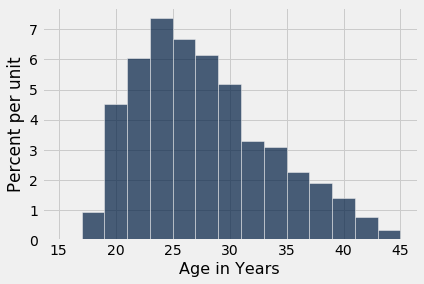

In [103]:
both.hist("Age in Years", bins = np.arange(15, 46, 2))

(-2, 3.1)

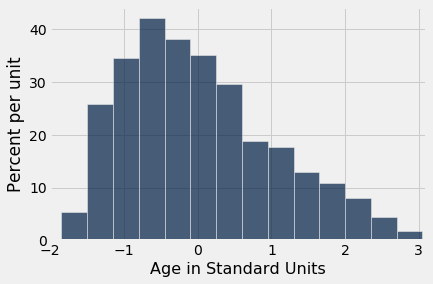

In [108]:
both.hist("Age in Standard Units", bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1)

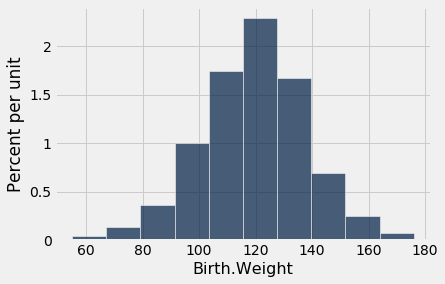

In [109]:
births.hist("Birth.Weight", ec = "w")

In [110]:
bw = births.column("Birth.Weight")
np.average(bw), np.std(bw)

(119.46252129471891, 18.32086370220278)

# Central Limit Theorem


In [111]:
united = Table.read_table("united_summer2015.csv")
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


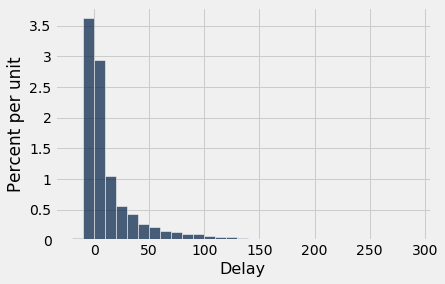

In [116]:
united.hist("Delay", bins=np.arange(-20, 300, 10), ec = "w")

In [123]:
sample_size = 500

In [124]:
averages = make_array()

In [129]:
for i in np.arange(1000):
    sample_flights = united.sample(sample_size) #it draws with repacement by default
    sample_average = np.average(sample_flights.column('Delay'))
    averages = np.append(averages, sample_average)

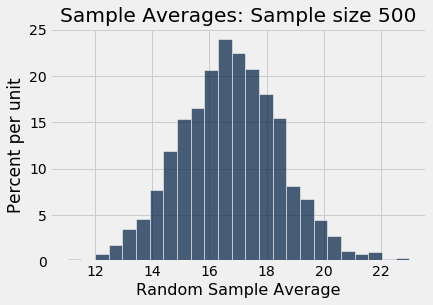

In [137]:
Table().with_column("Sample Average", averages).hist(bins = 25, ec = "w")
plots.title("Sample Averages: Sample size " + str(sample_size))
plots.xlabel("Random Sample Average");